I have chosen to work with Martian atmospheric datasets for my final project, because I have a deep interest in learning more about the potential secondary home for humanity.  I follow Mars Missions and the work of SpaceX and NASA as closely as I can, and I thought this would be a great opportunity to work with the raw data first hand. 

Below I open the topography netcdf file with netCDF4.

In [18]:
from netCDF4 import Dataset

f = Dataset('mountain.nc')

Below, I open the topography netcdf file with xarray, which I found preferable for graphing.

In [2]:
import xarray as xr

mountain = xr.open_dataset('mountain.nc', decode_times=False)

Below, I mapped the topographical data z_knot onto a Robinson projection of latitude and longitude.  This is because most built-in spherical maps are specific to earth.

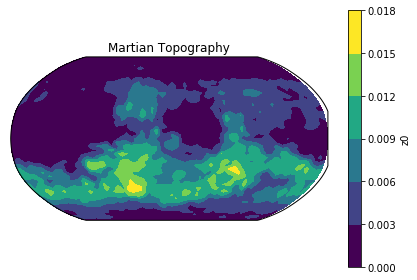

In [5]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

#makes the data 2-dimensional (lat, long, and the desired variable)
top = mountain['z0']
top['Time'] = pd.to_datetime(top['Time'])
data = top.sel(Time=pd.datetime(1970,1,1))

# create figure, axes instances.
fig, ax = plt.subplots()

ax = plt.axes(projection=ccrs.Robinson())
data.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.set_title('Martian Topography')

plt.tight_layout()
plt.show()

fig.savefig('marstop1.png')


The martian areoid is comparable to the earth's geoid, where it shows regions of equivalent geopotential, due to their non-perfectly spherical shapes.  In the case of mapping data from Mars, the Robinson projection seemed the most logical projection, in order to visualize the semispherical data.

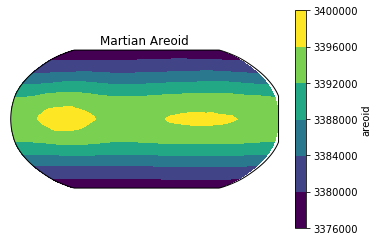

In [8]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd


top = mountain['areoid']
top['Time'] = pd.to_datetime(top['Time'])
data = top.sel(Time=pd.datetime(1970,1,1))

# create figure, axes instances.
fig, ax = plt.subplots()

ax = plt.axes(projection=ccrs.Robinson())
data.plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_title('Martian Areoid')
    
plt.show()
fig.savefig('areoid.png')

In [10]:
year_28 = xr.open_dataset('MY28_all_var_eo.nc', decode_times=False)

In [15]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

temper = year_28['temp']

for i in range(48):
    data = temper.sel(nevecs=1, altitude=year_28['altitude'][i])

    # create figure, axes instances.
    fig, ax = plt.subplots(figsize=(15,15))

    ax = plt.axes(projection=ccrs.Robinson())
    data.plot.contourf(ax=ax, transform=ccrs.PlateCarree());
    ax.set_title('Martian Temperature [K] for increasing altitude')
    
    #plt.show()
    fig.savefig('mtemp{0}.png'.format(i))
    plt.close('all')

Above, I loop through all of the given altitudes and map out the temperature over the planet, and save each in png format.  Below, I append each image into a gif, which loops through the temperature maps for ascending altitude.

A loop of martian temperature mapped onto a robinson projection of latitude and longitude, in ascending altitude is saved into the gif file 'mtempdatarobin.gif'

In [16]:
import imageio

filenames = []
for i in range(48):
    filenames.append('mtemp{0}.png'.format(i))

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('mtempdatarobin.gif', images)

Below, I mapped one of the other variables provided in Martian Year 28, the smoothed principal component, just to better visualize what information it provides.

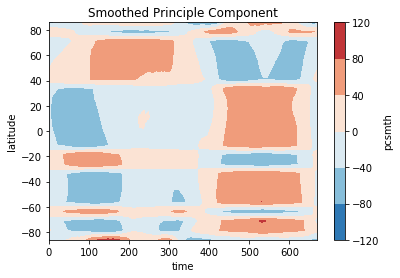

In [31]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd


smoo = year_28['pcsmth']
data = smoo.sel(nevecs=1)
data = data.T

# create figure, axes instances.
fig, ax = plt.subplots()
data.plot.contourf(ax=ax);
ax.set_title('Smoothed Principle Component')
    
plt.show()
fig.savefig('pcsmth.png')